### Install Packages

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 46.4 MB/s eta 0:00:00


### Data Exploration

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')

# Load the dataset
lipid_data = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps.csv')

# Display the first few rows of the dataset to get an overview
lipid_data.head()

Mounted at /content/drive/


,name,smiles
0,LMFA00000001,C=CCCCCC(C)CCCCCC#CCCC(OC)C(=O)OC(=O)C(CCC#CCC...
1,LMFA00000002,CCCCCCC[C@H](O)CC(=O)N[C@@H](CO)C(=O)O
2,LMFA00000003,CCCCCCCCCCCCCCCC(=O)OC(CCCCCCCCCCCCCC)CC(=O)N[...
3,LMFA00000004,CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)N[C@@H](CCC(N)=...
4,LMFA00000005,CC(C)CCCCCCCCCCCCCC(=O)OC(CCCCCCCCCCCC(C)C)CC(...


In [ ]:
lipid_data.shape

(47635, 2)

In [ ]:
lipid_data['smiles'][1]

'CCCCCCC[C@H](O)CC(=O)N[C@@H](CO)C(=O)O'

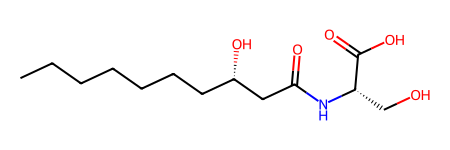

In [ ]:
from IPython.display import display
from PIL import Image
from rdkit import Chem
from rdkit.Chem import Draw

# Plot the second lipid molecule
mol = Chem.MolFromSmiles(lipid_data['smiles'][1])
mol

In [ ]:
# Basic statistics about the dataset
dataset_info = lipid_data.describe(include='all')
dataset_info

,name,smiles
count,46972,47635
unique,46971,47620
top,LMFA08040060,CCCCCCCCCCCC=C=CCCCC(=O)O
freq,2,3


In [ ]:
# Check for missing values
missing_values = lipid_data.isnull().sum()
missing_values

name      663
smiles      0
dtype: int64

In [ ]:

lipid_data_cleaned = lipid_data.drop_duplicates(subset='smiles', keep='first')
lipid_data_cleaned.shape

(47620, 2)

In [ ]:
import plotly.express as px

smiles_lengths = lipid_data_cleaned['smiles'].str.len()

# Create a histogram using Plotly Express
fig = px.histogram(smiles_lengths, nbins=500, title='Distribution of SMILES String Lengths',
                   labels={'value': 'Length of SMILES String', 'count': 'Number of Entries'},
                   template='plotly_white')

# Display the histogram
fig.show()

In [ ]:
from collections import Counter

# Concatenate all SMILES strings and count each character's occurrence
all_smiles_str = ''.join(lipid_data_cleaned['smiles'])
char_counts = Counter(all_smiles_str)

# Convert the counter to a DataFrame for easier visualization and sort by counts
char_counts_df = pd.DataFrame(char_counts.items(), columns=['Character', 'Count']).sort_values(by='Count', ascending=False)

char_counts_df

,Character,Count
0,C,1901717
5,O,451938
7,@,391602
2,(,374901
3,),374901
9,],289414
6,[,289414
8,H,270950
1,=,223250
11,/,119507


In [ ]:
# Plot the character frequencies using Plotly Express
fig_char_counts = px.bar(char_counts_df, x='Character', y='Count', title='Frequency of Characters in SMILES Strings',
                         labels={'Character': 'Character', 'Count': 'Frequency'},
                         template='plotly_white', color='Count', color_continuous_scale='Blues')

# Display the figure
fig_char_counts.show()

In [ ]:
from collections import defaultdict

def find_ngrams(text, n):
    """Generate n-grams from a given text."""
    return [text[i:i+n] for i in range(len(text) - n + 1)]

# Count 5-grams and 6-grams occurrences
ngram_counts = defaultdict(int)
for smiles in lipid_data_cleaned['smiles']:
    for ngram in find_ngrams(smiles, 5):
        ngram_counts[ngram] += 1
    for ngram in find_ngrams(smiles, 6):
        ngram_counts[ngram] += 1

# Convert the dictionary to a DataFrame and sort by counts
ngram_counts_df = pd.DataFrame(ngram_counts.items(), columns=['N-Gram', 'Count']).sort_values(by='Count', ascending=False)

# Take top 10 5-grams and 6-grams
top_ngrams = ngram_counts_df.head(10)
top_ngrams

,N-Gram,Count
2,CCCCC,601864
41,CCCCCC,514498
87,[C@H],166548
88,C@H](,117210
115,[C@H](,117210
250,O)[C@,111973
101,[C@@H,103811
130,[C@@H],103811
102,C@@H],103811
89,@H](O,101369


In [ ]:
# Plot the top N-grams using Plotly Express
fig_ngrams = px.bar(top_ngrams, x='N-Gram', y='Count', title='Top 10 Most Frequent 5-Grams and 6-Grams in SMILES Strings',
                    labels={'N-Gram': 'N-Gram', 'Count': 'Frequency'},
                    template='plotly_white', color='Count', color_continuous_scale='Blues')

# Display the figure
fig_ngrams.show()

In [ ]:
# Calculate number rings for each SMILES string
lipid_data_cleaned['Rings'] = lipid_data_cleaned['smiles'].str.count(r'[0-9]')

fig_rings = px.histogram(lipid_data_cleaned, x='Rings', title='Distribution of Rings in SMILES Strings',
                         labels={'Rings': 'Number of Rings'},
                         template='plotly_white', color_discrete_sequence=['lightcoral'])

fig_rings.show()

<ipython-input-14-6a3635b91b08>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Calculate the number of chiral centers for each SMILES string
lipid_data_cleaned['Chiral Centers (@)'] = lipid_data_cleaned['smiles'].str.count('@') - 2 * lipid_data_cleaned['smiles'].str.count('@@')
lipid_data_cleaned['Chiral Centers (@@)'] = lipid_data_cleaned['smiles'].str.count('@@')

# Visualize the distribution of chiral centers
fig_chiral_at = px.histogram(lipid_data_cleaned, x='Chiral Centers (@)', title='Distribution of Chiral Centers (@) in SMILES Strings',
                             labels={'Chiral Centers (@)': 'Number of @ Chiral Centers'},
                             template='plotly_white', color_discrete_sequence=['skyblue'])

fig_chiral_atat = px.histogram(lipid_data_cleaned, x='Chiral Centers (@@)', title='Distribution of Chiral Centers (@@) in SMILES Strings',
                               labels={'Chiral Centers (@@)': 'Number of @@ Chiral Centers'},
                               template='plotly_white', color_discrete_sequence=['lightcoral'])

fig_chiral_at

<ipython-input-15-4a875d9eee37>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-15-4a875d9eee37>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig_chiral_atat

In [ ]:
from rdkit.Chem import Descriptors

# Create a function to calculate molecular weight
def calculate_molecular_weight(smiles_string):
    mol = Chem.MolFromSmiles(smiles_string)
    if mol:  # Check if the molecule conversion was successful
        return Descriptors.ExactMolWt(mol)
    else:
        return None

# Calculate the exact molecular weights
lipid_data['Exact Molecular Weight'] = lipid_data['smiles'].apply(calculate_molecular_weight)

# Create a Plotly histogram for the molecular weights
fig = px.histogram(lipid_data, x='Exact Molecular Weight',
                   title='Distribution of Exact Molecular Weights',
                   labels={'Exact Molecular Weight': 'Molecular Weight (g/mol)'},
                   template='plotly_white', color_discrete_sequence=['lightgreen'])

# Display the figure
fig.show()

In [ ]:
# Count the number of aromatic atoms in each molecule
lipid_data_cleaned['Aromatic Atoms'] = lipid_data_cleaned['smiles'].str.count(r'[a-z]')
# Calculate the percentage of molecules that contain aromatic rings
percentage_aromatic = (lipid_data_cleaned['Aromatic Atoms'] > 0).mean() * 100

# Summary of aromaticity
aromatic_summary = {
    'Total Molecules': len(lipid_data_cleaned),
    'Molecules with Aromatic Rings': (lipid_data_cleaned['Aromatic Atoms'] > 0).sum(),
    'Percentage with Aromatic Rings': percentage_aromatic
}

aromatic_summary['Molecules without Aromatic Rings'] = aromatic_summary['Total Molecules'] - aromatic_summary['Molecules with Aromatic Rings']

# Data for the pie chart
labels = ['Molecules with Aromatic Rings', 'Molecules without Aromatic Rings']
values = [aromatic_summary['Molecules with Aromatic Rings'], aromatic_summary['Molecules without Aromatic Rings']]

# Create the pie chart
fig = px.pie(values=values, names=labels, title="Proportion of Molecules with and without Aromatic Rings")
fig.show()


<ipython-input-18-e39e82cd40f7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Data Preparation

1. Data Cleaning and Standardization:
  - Canonicalization of SMILES: The dataset, initially loaded from a CSV file, undergoes a cleaning step where each SMILES string is converted into a standard, canonical form. This ensures that different textual representations of the same molecule are unified, mitigating any discrepancies that might arise due to varied formats.
  - Removal of Duplicates and Invalid Entries: Duplicate entries are removed, and any entries that cannot be successfully converted to their canonical form are excluded from the dataset.
2. Character Encoding:
  - The cleaned SMILES strings are analyzed to identify all unique characters utilized in their notation.
  - These characters are mapped to unique integers, facilitating their use in numerical models. This mapping ensures that the chemical information, initially in a textual format, can be comprehended by algorithms.
3. Data Preparation for Model Training:
  - The entire dataset of SMILES strings is amalgamated into a single string, which is then divided into training and validation sets, ensuring a reserve of data to evaluate the model's performance later.
  - The character-to-integer mapping is employed to convert these textual data into a numerical format, making them compatible with machine learning algorithms.
4. Storing Preprocessed Data:
  - The processed and encoded data, along with essential mapping information, is securely stored. This ensures that the preprocessing steps do not have to be repeated in future analyses and allows for consistency across different models and studies.

In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
from rdkit import Chem


def canonicalize(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.MolToSmiles(mol)
    else:
        return None


lipid_data = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps.csv').drop_duplicates(subset=['smiles'])
print(lipid_data.shape)
lipid_data['smiles'] = lipid_data['smiles'].apply(canonicalize)
lipid_data = lipid_data.dropna()
print(lipid_data.shape)
lipid_data = lipid_data.sample(frac=1).reset_index(drop=True)
lipid_data.to_csv('/content/drive/MyDrive/DATA 606/lipid_maps_clean.csv', index = False)

data = '\n'.join(lipid_data['smiles'])

chars = sorted(list(set(data)))
vocab_size = len(chars)
print("all the unique characters:", ''.join(chars))
print(f"vocab size: {vocab_size:,}")

# create a mapping from characters to integers
stoi = {ch:i for i,ch in enumerate(chars)}
itos = {i:ch for i,ch in enumerate(chars)}
def encode(s):
    return [stoi[c] for c in s] # encoder: take a string, output a list of integers
def decode(l):
    return ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode('\n'))
# create the train and test splits
n = len(data)
train_data = data[:int(n*0.9)]
val_data = data[int(n*0.9):]

# encode both to integers
train_ids = encode(train_data)
val_ids = encode(val_data)
print(f"train has {len(train_ids):,} tokens")
print(f"val has {len(val_ids):,} tokens")

# export to bin files
train_ids = np.array(train_ids, dtype=np.uint16)
val_ids = np.array(val_ids, dtype=np.uint16)
train_ids.tofile('/content/drive/MyDrive/DATA 606/train.bin')
val_ids.tofile('/content/drive/MyDrive/DATA 606/val.bin')

# save the meta information as well, to help us encode/decode later
meta = {'vocab_size': vocab_size, 'itos': itos, 'stoi': stoi}

with open('/content/drive/MyDrive/DATA 606/meta.pkl', 'wb') as f:
    pickle.dump(meta, f)

(47620, 2)
(46957, 2)
all the unique characters: 
#%()+-./0123456789=@ABCFHINOPS[\]ceilnors
vocab size: 42
[0]
train has 4,591,069 tokens
val has 510,119 tokens


### Model Training

Define and implement a model inspired by the GPT architecture, set up training and evaluation functionality, and include mechanisms for logging and saving during training. It is designed to be flexible, allowing for various configurations and initialization methods, and it has support for distributed training.

In [ ]:
import os
import sys
import time
import math
import pickle
from contextlib import nullcontext
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.distributed import init_process_group, destroy_process_group
import math
import inspect
from dataclasses import dataclass
from ast import literal_eval


class LayerNorm(nn.Module):
    """ LayerNorm but with an optional bias. PyTorch doesn't support simply bias=False """

    def __init__(self, ndim, bias):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(ndim))
        self.bias = nn.Parameter(torch.zeros(ndim)) if bias else None

    def forward(self, input):
        return F.layer_norm(input, self.weight.shape, self.weight, self.bias, 1e-5)

class CausalSelfAttention(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.n_embd % config.n_head == 0
        # key, query, value projections for all heads, but in a batch
        self.c_attn = nn.Linear(config.n_embd, 3 * config.n_embd, bias=config.bias)
        # output projection
        self.c_proj = nn.Linear(config.n_embd, config.n_embd, bias=config.bias)
        # regularization
        self.attn_dropout = nn.Dropout(config.dropout)
        self.resid_dropout = nn.Dropout(config.dropout)
        self.n_head = config.n_head
        self.n_embd = config.n_embd
        self.dropout = config.dropout
        # flash attention make GPU go brrrrr but support is only in PyTorch >= 2.0
        self.flash = hasattr(torch.nn.functional, 'scaled_dot_product_attention')
        if not self.flash:
            print("WARNING: using slow attention. Flash Attention requires PyTorch >= 2.0")
            # causal mask to ensure that attention is only applied to the left in the input sequence
            self.register_buffer("bias", torch.tril(torch.ones(config.block_size, config.block_size))
                                        .view(1, 1, config.block_size, config.block_size))

    def forward(self, x):
        B, T, C = x.size() # batch size, sequence length, embedding dimensionality (n_embd)

        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        q, k, v  = self.c_attn(x).split(self.n_embd, dim=2)
        k = k.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        q = q.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)
        v = v.view(B, T, self.n_head, C // self.n_head).transpose(1, 2) # (B, nh, T, hs)

        # causal self-attention; Self-attend: (B, nh, T, hs) x (B, nh, hs, T) -> (B, nh, T, T)
        if self.flash:
            # efficient attention using Flash Attention CUDA kernels
            y = torch.nn.functional.scaled_dot_product_attention(q, k, v, attn_mask=None, dropout_p=self.dropout if self.training else 0, is_causal=True)
        else:
            # manual implementation of attention
            att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
            att = att.masked_fill(self.bias[:,:,:T,:T] == 0, float('-inf'))
            att = F.softmax(att, dim=-1)
            att = self.attn_dropout(att)
            y = att @ v # (B, nh, T, T) x (B, nh, T, hs) -> (B, nh, T, hs)
        y = y.transpose(1, 2).contiguous().view(B, T, C) # re-assemble all head outputs side by side

        # output projection
        y = self.resid_dropout(self.c_proj(y))
        return y

class MLP(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.c_fc    = nn.Linear(config.n_embd, 4 * config.n_embd, bias=config.bias)
        self.gelu    = nn.GELU()
        self.c_proj  = nn.Linear(4 * config.n_embd, config.n_embd, bias=config.bias)
        self.dropout = nn.Dropout(config.dropout)

    def forward(self, x):
        x = self.c_fc(x)
        x = self.gelu(x)
        x = self.c_proj(x)
        x = self.dropout(x)
        return x

class Block(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.ln_1 = LayerNorm(config.n_embd, bias=config.bias)
        self.attn = CausalSelfAttention(config)
        self.ln_2 = LayerNorm(config.n_embd, bias=config.bias)
        self.mlp = MLP(config)

    def forward(self, x):
        x = x + self.attn(self.ln_1(x))
        x = x + self.mlp(self.ln_2(x))
        return x

@dataclass
class GPTConfig:
    block_size: int = 1024
    vocab_size: int = 50304 # GPT-2 vocab_size of 50257, padded up to nearest multiple of 64 for efficiency
    n_layer: int = 12
    n_head: int = 12
    n_embd: int = 768
    dropout: float = 0.0
    bias: bool = True # True: bias in Linears and LayerNorms, like GPT-2. False: a bit better and faster

class GPT(nn.Module):

    def __init__(self, config):
        super().__init__()
        assert config.vocab_size is not None
        assert config.block_size is not None
        self.config = config

        self.transformer = nn.ModuleDict(dict(
            wte = nn.Embedding(config.vocab_size, config.n_embd),
            wpe = nn.Embedding(config.block_size, config.n_embd),
            drop = nn.Dropout(config.dropout),
            h = nn.ModuleList([Block(config) for _ in range(config.n_layer)]),
            ln_f = LayerNorm(config.n_embd, bias=config.bias),
        ))
        self.lm_head = nn.Linear(config.n_embd, config.vocab_size, bias=False)
        self.transformer.wte.weight = self.lm_head.weight # https://paperswithcode.com/method/weight-tying

        # init all weights
        self.apply(self._init_weights)
        # apply special scaled init to the residual projections, per GPT-2 paper
        for pn, p in self.named_parameters():
            if pn.endswith('c_proj.weight'):
                torch.nn.init.normal_(p, mean=0.0, std=0.02/math.sqrt(2 * config.n_layer))

        # report number of parameters
        print("number of parameters: %.2fM" % (self.get_num_params()/1e6,))

    def get_num_params(self, non_embedding=True):
        """
        Return the number of parameters in the model.
        For non-embedding count (default), the position embeddings get subtracted.
        The token embeddings would too, except due to the parameter sharing these
        params are actually used as weights in the final layer, so we include them.
        """
        n_params = sum(p.numel() for p in self.parameters())
        if non_embedding:
            n_params -= self.transformer.wpe.weight.numel()
        return n_params

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)

    def forward(self, idx, targets=None):
        device = idx.device
        b, t = idx.size()
        assert t <= self.config.block_size, f"Cannot forward sequence of length {t}, block size is only {self.config.block_size}"
        pos = torch.arange(0, t, dtype=torch.long, device=device) # shape (t)

        # forward the GPT model itself
        tok_emb = self.transformer.wte(idx) # token embeddings of shape (b, t, n_embd)
        pos_emb = self.transformer.wpe(pos) # position embeddings of shape (t, n_embd)
        x = self.transformer.drop(tok_emb + pos_emb)
        for block in self.transformer.h:
            x = block(x)
        x = self.transformer.ln_f(x)

        if targets is not None:
            # if we are given some desired targets also calculate the loss
            logits = self.lm_head(x)
            loss = F.cross_entropy(logits.view(-1, logits.size(-1)), targets.view(-1), ignore_index=-1)
        else:
            # inference-time mini-optimization: only forward the lm_head on the very last position
            logits = self.lm_head(x[:, [-1], :]) # note: using list [-1] to preserve the time dim
            loss = None

        return logits, loss

    def crop_block_size(self, block_size):
        # model surgery to decrease the block size if necessary
        # e.g. we may load the GPT2 pretrained model checkpoint (block size 1024)
        # but want to use a smaller block size for some smaller, simpler model
        assert block_size <= self.config.block_size
        self.config.block_size = block_size
        self.transformer.wpe.weight = nn.Parameter(self.transformer.wpe.weight[:block_size])
        for block in self.transformer.h:
            if hasattr(block.attn, 'bias'):
                block.attn.bias = block.attn.bias[:,:,:block_size,:block_size]

    @classmethod
    def from_pretrained(cls, model_type, override_args=None):
        assert model_type in {'gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl'}
        override_args = override_args or {} # default to empty dict
        # only dropout can be overridden see more notes below
        assert all(k == 'dropout' for k in override_args)
        from transformers import GPT2LMHeadModel
        print("loading weights from pretrained gpt: %s" % model_type)

        # n_layer, n_head and n_embd are determined from model_type
        config_args = {
            'gpt2':         dict(n_layer=12, n_head=12, n_embd=768),  # 124M params
            'gpt2-medium':  dict(n_layer=24, n_head=16, n_embd=1024), # 350M params
            'gpt2-large':   dict(n_layer=36, n_head=20, n_embd=1280), # 774M params
            'gpt2-xl':      dict(n_layer=48, n_head=25, n_embd=1600), # 1558M params
        }[model_type]
        print("forcing vocab_size=50257, block_size=1024, bias=True")
        config_args['vocab_size'] = 50257 # always 50257 for GPT model checkpoints
        config_args['block_size'] = 1024 # always 1024 for GPT model checkpoints
        config_args['bias'] = True # always True for GPT model checkpoints
        # we can override the dropout rate, if desired
        if 'dropout' in override_args:
            print(f"overriding dropout rate to {override_args['dropout']}")
            config_args['dropout'] = override_args['dropout']
        # create a from-scratch initialized minGPT model
        config = GPTConfig(**config_args)
        model = GPT(config)
        sd = model.state_dict()
        sd_keys = sd.keys()
        sd_keys = [k for k in sd_keys if not k.endswith('.attn.bias')] # discard this mask / buffer, not a param

        # init a huggingface/transformers model
        model_hf = GPT2LMHeadModel.from_pretrained(model_type)
        sd_hf = model_hf.state_dict()

        # copy while ensuring all of the parameters are aligned and match in names and shapes
        sd_keys_hf = sd_hf.keys()
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.masked_bias')] # ignore these, just a buffer
        sd_keys_hf = [k for k in sd_keys_hf if not k.endswith('.attn.bias')] # same, just the mask (buffer)
        transposed = ['attn.c_attn.weight', 'attn.c_proj.weight', 'mlp.c_fc.weight', 'mlp.c_proj.weight']
        # basically the openai checkpoints use a "Conv1D" module, but we only want to use a vanilla Linear
        # this means that we have to transpose these weights when we import them
        assert len(sd_keys_hf) == len(sd_keys), f"mismatched keys: {len(sd_keys_hf)} != {len(sd_keys)}"
        for k in sd_keys_hf:
            if any(k.endswith(w) for w in transposed):
                # special treatment for the Conv1D weights we need to transpose
                assert sd_hf[k].shape[::-1] == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k].t())
            else:
                # vanilla copy over the other parameters
                assert sd_hf[k].shape == sd[k].shape
                with torch.no_grad():
                    sd[k].copy_(sd_hf[k])

        return model

    def configure_optimizers(self, weight_decay, learning_rate, betas, device_type):
        # start with all of the candidate parameters
        param_dict = {pn: p for pn, p in self.named_parameters()}
        # filter out those that do not require grad
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # create optim groups. Any parameters that is 2D will be weight decayed, otherwise no.
        # i.e. all weight tensors in matmuls + embeddings decay, all biases and layernorms don't.
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        # Create AdamW optimizer and use the fused version if it is available
        fused_available = 'fused' in inspect.signature(torch.optim.AdamW).parameters
        use_fused = fused_available and device_type == 'cuda'
        extra_args = dict(fused=True) if use_fused else dict()
        optimizer = torch.optim.AdamW(optim_groups, lr=learning_rate, betas=betas, **extra_args)
        print(f"using fused AdamW: {use_fused}")

        return optimizer

    def estimate_mfu(self, fwdbwd_per_iter, dt):
        """ estimate model flops utilization (MFU) in units of A100 bfloat16 peak FLOPS """
        # first estimate the number of flops we do per iteration.
        # see PaLM paper Appendix B as ref: https://arxiv.org/abs/2204.02311
        N = self.get_num_params()
        cfg = self.config
        L, H, Q, T = cfg.n_layer, cfg.n_head, cfg.n_embd//cfg.n_head, cfg.block_size
        flops_per_token = 6*N + 12*L*H*Q*T
        flops_per_fwdbwd = flops_per_token * T
        flops_per_iter = flops_per_fwdbwd * fwdbwd_per_iter
        # express our flops throughput as ratio of A100 bfloat16 peak flops
        flops_achieved = flops_per_iter * (1.0/dt) # per second
        flops_promised = 312e12 # A100 GPU bfloat16 peak flops is 312 TFLOPS
        mfu = flops_achieved / flops_promised
        return mfu


    @torch.no_grad()
    def generate(self, idx, max_new_tokens, temperature=1.0, top_k=None):

        while True:
            # if the sequence context is growing too long we must crop it at block_size
            idx_cond = idx if idx.size(1) <= self.config.block_size else idx[:, -self.config.block_size:]
            # forward the model to get the logits for the index in the sequence
            logits, _ = self(idx_cond)
            # pluck the logits at the final step and scale by desired temperature
            logits = logits[:, -1, :] / temperature
            # optionally crop the logits to only the top k options
            if top_k is not None:
                v, _ = torch.topk(logits, min(top_k, logits.size(-1)))
                logits[logits < v[:, [-1]]] = -float('Inf')
            # apply softmax to convert logits to (normalized) probabilities
            probs = F.softmax(logits, dim=-1)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1)
            if idx_next.item() == 0:
                break
            else:
                idx = torch.cat((idx, idx_next), dim=1)

        return idx


out_dir = '/content/drive/MyDrive/DATA 606'
eval_interval = 250 # keep frequent because we'll overfit
eval_iters = 200
log_interval = 10 # don't print too too often
always_save_checkpoint = False
wandb_log = False # override via command line if you like
wandb_project = 'lipid-char'
wandb_run_name = 'mini-gpt'
dataset = 'lipid_char'
gradient_accumulation_steps = 1
batch_size = 64
block_size = 256 # context of up to 256 previous characters
n_layer = 6
n_head = 6
n_embd = 384
dropout = 0.05
learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters = 5000
lr_decay_iters = 5000 # make equal to max_iters usually
min_lr = 1e-4 # learning_rate / 10 usually
beta2 = 0.99 # make a bit bigger because number of tokens per iter is small
warmup_iters = 100 # not super necessary potentially
eval_only = False # if True, script exits right after the first eval
init_from = 'scratch' # 'scratch' or 'resume' or 'gpt2*'
bias = False # do we use bias inside LayerNorm and Linear layers?
weight_decay = 1e-1
beta1 = 0.9
grad_clip = 1.0 # clip gradients at this value, or disable if == 0.0
decay_lr = True # whether to decay the learning rate
min_lr = 6e-5 # minimum learning rate, should be ~= learning_rate/10 per Chinchilla
backend = 'nccl' # 'nccl', 'gloo', etc.
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1' etc., or try 'mps' on macbooks
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32', 'bfloat16', or 'float16', the latter will auto implement a GradScaler
compile = False # use PyTorch 2.0 to compile the model to be faster
config_keys = [k for k,v in globals().items() if not k.startswith('_') and isinstance(v, (int, float, bool, str))]
config = {k: globals()[k] for k in config_keys} # will be useful for logging
ddp = int(os.environ.get('RANK', -1)) != -1 # is this a ddp run?


if ddp:
    init_process_group(backend=backend)
    ddp_rank = int(os.environ['RANK'])
    ddp_local_rank = int(os.environ['LOCAL_RANK'])
    ddp_world_size = int(os.environ['WORLD_SIZE'])
    device = f'cuda:{ddp_local_rank}'
    torch.cuda.set_device(device)
    master_process = ddp_rank == 0 # this process will do logging, checkpointing etc.
    seed_offset = ddp_rank # each process gets a different seed
    assert gradient_accumulation_steps % ddp_world_size == 0
    gradient_accumulation_steps //= ddp_world_size
else:
    master_process = True
    seed_offset = 0
    ddp_world_size = 1
tokens_per_iter = gradient_accumulation_steps * ddp_world_size * batch_size * block_size
print(f"tokens per iteration will be: {tokens_per_iter:,}")
if master_process:
    os.makedirs(out_dir, exist_ok=True)
torch.manual_seed(1337 + seed_offset)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)
data_dir = '/content/drive/MyDrive/DATA 606'
train_data = np.memmap(os.path.join(data_dir, 'train.bin'), dtype=np.uint16, mode='r')
val_data = np.memmap(os.path.join(data_dir, 'val.bin'), dtype=np.uint16, mode='r')
def get_batch(split):
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([torch.from_numpy((data[i:i+block_size]).astype(np.int64)) for i in ix])
    y = torch.stack([torch.from_numpy((data[i+1:i+1+block_size]).astype(np.int64)) for i in ix])
    if device_type == 'cuda':
        x, y = x.pin_memory().to(device, non_blocking=True), y.pin_memory().to(device, non_blocking=True)
    else:
        x, y = x.to(device), y.to(device)
    return x, y
iter_num = 0
best_val_loss = 1e9
meta_path = os.path.join(data_dir, 'meta.pkl')
meta_vocab_size = None
if os.path.exists(meta_path):
    with open(meta_path, 'rb') as f:
        meta = pickle.load(f)
    meta_vocab_size = meta['vocab_size']
    print(f"found vocab_size = {meta_vocab_size} (inside {meta_path})")
model_args = dict(n_layer=n_layer, n_head=n_head, n_embd=n_embd, block_size=block_size,
                  bias=bias, vocab_size=None, dropout=dropout) # start with model_args from command line
if init_from == 'scratch':
    print("Initializing a new model from scratch")
    if meta_vocab_size is None:
        print("defaulting to vocab_size of GPT-2 to 50304 (50257 rounded up for efficiency)")
    model_args['vocab_size'] = meta_vocab_size if meta_vocab_size is not None else 50304
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
elif init_from == 'resume':
    print(f"Resuming training from {out_dir}")
    ckpt_path = os.path.join(out_dir, 'ckpt.pt')
    checkpoint = torch.load(ckpt_path, map_location=device)
    checkpoint_model_args = checkpoint['model_args']
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = checkpoint_model_args[k]
    gptconf = GPTConfig(**model_args)
    model = GPT(gptconf)
    state_dict = checkpoint['model']
    unwanted_prefix = '_orig_mod.'
    for k,v in list(state_dict.items()):
        if k.startswith(unwanted_prefix):
            state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
    model.load_state_dict(state_dict)
    iter_num = checkpoint['iter_num']
    best_val_loss = checkpoint['best_val_loss']
elif init_from.startswith('gpt2'):
    print(f"Initializing from OpenAI GPT-2 weights: {init_from}")
    override_args = dict(dropout=dropout)
    model = GPT.from_pretrained(init_from, override_args)
    for k in ['n_layer', 'n_head', 'n_embd', 'block_size', 'bias', 'vocab_size']:
        model_args[k] = getattr(model.config, k)
if block_size < model.config.block_size:
    model.crop_block_size(block_size)
    model_args['block_size'] = block_size # so that the checkpoint will have the right value
model.to(device)
scaler = torch.cuda.amp.GradScaler(enabled=(dtype == 'float16'))
optimizer = model.configure_optimizers(weight_decay, learning_rate, (beta1, beta2), device_type)
if init_from == 'resume':
    optimizer.load_state_dict(checkpoint['optimizer'])
checkpoint = None # free up memory
if compile:
    print("compiling the model... (takes a ~minute)")
    unoptimized_model = model
    model = torch.compile(model) # requires PyTorch 2.0
if ddp:
    model = DDP(model, device_ids=[ddp_local_rank])
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            with ctx:
                logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out
def get_lr(it):
    if it < warmup_iters:
        return learning_rate * it / warmup_iters
    if it > lr_decay_iters:
        return min_lr
    decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
    assert 0 <= decay_ratio <= 1
    coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
    return min_lr + coeff * (learning_rate - min_lr)
if wandb_log and master_process:
    import wandb
    wandb.init(project=wandb_project, name=wandb_run_name, config=config)
X, Y = get_batch('train') # fetch the very first batch
t0 = time.time()
local_iter_num = 0 # number of iterations in the lifetime of this process
raw_model = model.module if ddp else model # unwrap DDP container if needed
running_mfu = -1.0
while True:
    lr = get_lr(iter_num) if decay_lr else learning_rate
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

    if iter_num % eval_interval == 0 and master_process:
        losses = estimate_loss()
        print(f"step {iter_num}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        if wandb_log:
            wandb.log({
                "iter": iter_num,
                "train/loss": losses['train'],
                "val/loss": losses['val'],
                "lr": lr,
                "mfu": running_mfu*100,
            })
        if losses['val'] < best_val_loss or always_save_checkpoint:
            best_val_loss = losses['val']
            if iter_num > 0:
                checkpoint = {
                    'model': raw_model.state_dict(),
                    'optimizer': optimizer.state_dict(),
                    'model_args': model_args,
                    'iter_num': iter_num,
                    'best_val_loss': best_val_loss,
                    'config': config,
                }
                print(f"saving checkpoint to {out_dir}")
                torch.save(checkpoint, os.path.join(out_dir, 'ckpt.pt'))
    if iter_num == 0 and eval_only:
        break
    for micro_step in range(gradient_accumulation_steps):
        if ddp:
            model.require_backward_grad_sync = (micro_step == gradient_accumulation_steps - 1)
        with ctx:
            logits, loss = model(X, Y)
            loss = loss / gradient_accumulation_steps # scale the loss to account for gradient accumulation
        X, Y = get_batch('train')
        scaler.scale(loss).backward()
    if grad_clip != 0.0:
        scaler.unscale_(optimizer)
        torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    scaler.step(optimizer)
    scaler.update()
    optimizer.zero_grad(set_to_none=True)
    t1 = time.time()
    dt = t1 - t0
    t0 = t1
    if iter_num % log_interval == 0 and master_process:
        lossf = loss.item() * gradient_accumulation_steps
        if local_iter_num >= 5: # let the training loop settle a bit
            mfu = raw_model.estimate_mfu(batch_size * gradient_accumulation_steps, dt)
            running_mfu = mfu if running_mfu == -1.0 else 0.9*running_mfu + 0.1*mfu
        print(f"iter {iter_num}: loss {lossf:.4f}, time {dt*1000:.2f}ms, mfu {running_mfu*100:.2f}%")
    iter_num += 1
    local_iter_num += 1
    if iter_num > max_iters:
        break
if ddp:
    destroy_process_group()

tokens per iteration will be: 16,384
found vocab_size = 42 (inside /content/drive/MyDrive/DATA 606/meta.pkl)
Initializing a new model from scratch
number of parameters: 10.64M
num decayed parameter tensors: 26, with 10,731,264 parameters
num non-decayed parameter tensors: 13, with 4,992 parameters
using fused AdamW: True
step 0: train loss 3.5985, val loss 3.6009
iter 0: loss 3.6315, time 16364.54ms, mfu -100.00%
iter 10: loss 1.6653, time 112.34ms, mfu 3.31%
iter 20: loss 1.3244, time 113.93ms, mfu 3.31%
iter 30: loss 1.2994, time 113.40ms, mfu 3.31%
iter 40: loss 1.2208, time 113.52ms, mfu 3.30%
iter 50: loss 1.1900, time 115.47ms, mfu 3.30%
iter 60: loss 1.1260, time 116.03ms, mfu 3.29%
iter 70: loss 1.1235, time 115.93ms, mfu 3.28%
iter 80: loss 1.0281, time 117.86ms, mfu 3.27%
iter 90: loss 0.9541, time 112.94ms, mfu 3.27%
iter 100: loss 0.9395, time 116.39ms, mfu 3.26%
iter 110: loss 0.8399, time 117.31ms, mfu 3.25%
iter 120: loss 0.7724, time 113.51ms, mfu 3.26%
iter 130: loss 0

### Generate SMILES

Generate SMILES strings utilizing the pre-trained model based on GPT (Generative Pretrained Transformer) architecture.

In [ ]:
import os
import pickle
from contextlib import nullcontext
import torch
from rdkit import Chem
import pandas as pd

init_from = 'resume' # either 'resume' (from an out_dir) or a gpt2 variant (e.g. 'gpt2-xl')
start = "\n" # or "<|endoftext|>" or etc. Can also specify a file, use as: "FILE:prompt.txt"
num_samples = 100 # number of samples to draw
max_new_tokens = 1024 # number of tokens generated in each sample
temperature = 0.8 # 1.0 = no change, < 1.0 = less random, > 1.0 = more random, in predictions
top_k = 100 # retain only the top_k most likely tokens, clamp others to have 0 probability
#seed = 1337
#seed = 3
device = 'cuda' # examples: 'cpu', 'cuda', 'cuda:0', 'cuda:1', etc.
dtype = 'bfloat16' if torch.cuda.is_available() and torch.cuda.is_bf16_supported() else 'float16' # 'float32' or 'bfloat16' or 'float16'
compile = False # use PyTorch 2.0 to compile the model to be faster
#torch.manual_seed(seed)
#torch.cuda.manual_seed(seed)
torch.backends.cuda.matmul.allow_tf32 = True # allow tf32 on matmul
torch.backends.cudnn.allow_tf32 = True # allow tf32 on cudnn
device_type = 'cuda' if 'cuda' in device else 'cpu' # for later use in torch.autocast
ptdtype = {'float32': torch.float32, 'bfloat16': torch.bfloat16, 'float16': torch.float16}[dtype]
ctx = nullcontext() if device_type == 'cpu' else torch.amp.autocast(device_type=device_type, dtype=ptdtype)
if init_from == 'resume':
    ckpt_path = os.path.join(out_dir, 'ckpt.pt')
    checkpoint = torch.load(ckpt_path, map_location=device)
    gptconf = GPTConfig(**checkpoint['model_args'])
    model = GPT(gptconf)
    state_dict = checkpoint['model']
    unwanted_prefix = '_orig_mod.'
    for k,v in list(state_dict.items()):
        if k.startswith(unwanted_prefix):
            state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
    model.load_state_dict(state_dict)
elif init_from.startswith('gpt2'):
    model = GPT.from_pretrained(init_from, dict(dropout=0.0))
model.eval()
model.to(device)
if compile:
    model = torch.compile(model) # requires PyTorch 2.0 (optional)

if init_from == 'resume' and 'config' in checkpoint and 'dataset' in checkpoint['config']: # older checkpoints might not have these...
    meta_path = os.path.join('/content/drive/MyDrive/DATA 606/', 'meta.pkl')
    load_meta = os.path.exists(meta_path)

print(f"Loading meta from {meta_path}...")
with open(meta_path, 'rb') as f:
    meta = pickle.load(f)
stoi, itos = meta['stoi'], meta['itos']
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join([itos[i] for i in l])

if start.startswith('FILE:'):
    with open(start[5:], 'r', encoding='utf-8') as f:
        start = f.read()
start_ids = encode(start)
#start_ids = encode('C(=O)OCC(CC')
#start_ids = encode('\nC')
x = (torch.tensor(start_ids, dtype=torch.long, device=device)[None, ...])
gen_list = []
smiles_list = []
with torch.no_grad():
    with ctx:
        for k in range(num_samples):
            if k % 100 == 0:
                print(k)
            y = model.generate(x, max_new_tokens, temperature=temperature, top_k=top_k)
            #print(decode(y[0].tolist()))
            smiles = decode(y[0].tolist()).replace('\n', '')
            gen_list.append(smiles)
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                smiles = Chem.MolToSmiles(mol)
                smiles_list.append(smiles)
            else:
                smiles_list.append('')
            #print(smiles)


gen_lipids = pd.DataFrame({'gen_smiles': gen_list,'canonical_smiles': smiles_list})
gen_lipids.to_csv('/content/drive/MyDrive/DATA 606/test.csv', index=False)
# gen_lipids.to_csv('/content/drive/MyDrive/DATA 606/lipid_maps_gen_lipids.csv', index=False)

number of parameters: 10.64M
Loading meta from /content/drive/MyDrive/DATA 606/meta.pkl...
0


[15:33:57] SMILES Parse Error: extra close parentheses while parsing: CC1OC(O)/C=C/C=C\C/C=C\C=C\[C@@H](O)CCCC(=O)O)CCC1=O
[15:33:57] SMILES Parse Error: Failed parsing SMILES 'CC1OC(O)/C=C/C=C\C/C=C\C=C\[C@@H](O)CCCC(=O)O)CCC1=O' for input: 'CC1OC(O)/C=C/C=C\C/C=C\C=C\[C@@H](O)CCCC(=O)O)CCC1=O'
[15:34:00] SMILES Parse Error: extra close parentheses while parsing: C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@@H](C)C#CCCCC(O)(CC)CC)OC)CC[C@@H]23)C[C@@H](O)C[C@@H]1O
[15:34:00] SMILES Parse Error: Failed parsing SMILES 'C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@@H](C)C#CCCCC(O)(CC)CC)OC)CC[C@@H]23)C[C@@H](O)C[C@@H]1O' for input: 'C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]([C@@H](C)C#CCCCC(O)(CC)CC)OC)CC[C@@H]23)C[C@@H](O)C[C@@H]1O'


### Evaluate Generated Molecules

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')

gen_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps_gen_lipids.csv')

gen_lipids[15:25]

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,gen_smiles,canonical_smiles
15,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,CCCCCCCCCCCCC/C=C/[C@@H](O)C(CO[C@@H]1O[C@H](C...
16,CCCCCCCCCCCCCCCCCCCCCCCC(C)CCCC(C)CCCCCCCCCCCC,CCCCCCCCCCCCCCCCCCCCCCCC(C)CCCC(C)CCCCCCCCCCCC
17,CCC(CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)C[...,CCC(CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]3[C@H](O)C[...
18,COc1cc(O)c2c(=O)c(OC)c(-c3ccc(O[C@@H]4O[C@H](C...,COc1cc(O)c2c(=O)c(OC)c(-c3ccc(O[C@@H]4O[C@H](C...
19,CCCCC/C=C\C/C=C\C/C=C\CCCCCCCCC(=O)OC[C@@H](CO...,CCCCC/C=C\C/C=C\C/C=C\CCCCCCCCC(=O)OC[C@@H](CO...
20,C=C(C)[C@@H]1CC=C2CC[C@@H](O)[C@@]2(C)[C@@H]1C...,NaN
21,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...,CCCCCCCCCCCCC/C=C/[C@@H](O)[C@H](CO[C@@H]1O[C@...
22,CCCCCCCC/C=C\CCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@...,CCCCCCCC/C=C\CCCCCCCCCCCCCCCC(=O)N[C@@H](CO[C@...
23,CCCCCCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OC...,CCCCCCCCCCCCCCCCCCCCCC(=O)OC[C@H](COP(=O)(O)OC...
24,CCCCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)OC[...,CCCCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O)OC[...


In [ ]:
print('Total number of generations: {:d}'.format(len(gen_lipids)))

Total number of generations: 100000


In [ ]:
valid_lipids = gen_lipids[~gen_lipids['canonical_smiles'].isna()]
print("Valid SMILES generated: {:d} ({:.2%})".format(len(valid_lipids), len(valid_lipids) / len(gen_lipids)))

Valid SMILES generated: 97935 (97.94%)


In [ ]:
print("Percentage of canonical SMILES generated: {:.2%}".format(sum(valid_lipids['gen_smiles'] == valid_lipids['canonical_smiles']) / len(valid_lipids)))

Percentage of canonical SMILES generated: 92.64%


In [ ]:
unique_lipids = valid_lipids['canonical_smiles'].drop_duplicates()
print("Percentage of unique SMILES generated: {:.2%}".format(len(unique_lipids) / len(valid_lipids)))

Percentage of unique SMILES generated: 44.69%


In [ ]:
training_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps_clean.csv')['smiles'].values
new_lipids = unique_lipids[~unique_lipids.isin(training_lipids)]
print("Percentage of new SMILES generated: {:.2%}".format(len(new_lipids) / len(unique_lipids)))

Percentage of new SMILES generated: 51.67%


In [ ]:
no_overlap = new_lipids[~new_lipids.apply(lambda x: any(x in y for y in training_lipids) or any(y in x for y in training_lipids))]
no_overlap

4        CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...
31       C=C(C)[C@H](CC)CC[C@@H](C)[C@H]1CC[C@H]2[C@@H]...
34       CC(C)=CCc1c(O)c(CC=C(C)C)c2oc(=O)cc(-c3ccc(O)c...
46                COc1cc(O)c2c(=O)c(OC)c(-c3ccccc3OC)oc2c1
58             CC(C)=CCc1c(O)ccc2c1OCC1c3cc4c(cc3OC21)OCO4
                               ...                        
99898    C[C@@H]1CC(=O)[C@@]2(OC1=O)O[C@H]1[C@H](O)[C@H...
99930    C[C@H](O)[C@H]1CC[C@H]2[C@@H]3CC[C@@H]4C[C@H](...
99937                  COc1ccccc1C1Oc2c(OC)c(O)cc(O)c2C1=O
99948              COc1ccc2c(c1)OC1C(O)Oc3ccc(OC)cc3C1C2=O
99959        COc1c(-c2ccccc2)oc2cc(O)c(CC=C(C)C)c(O)c2c1=O
Name: canonical_smiles, Length: 5213, dtype: object

In [ ]:
print("Percentage of new SMILES that doesn't overlap with any training SMILES: {:.2%}".format(len(no_overlap) / len(new_lipids)))

Percentage of new SMILES that doesn't overlap with any training SMILES: 23.05%


In [ ]:
no_overlap.to_csv('/content/drive/MyDrive/DATA 606/no_overlap.csv', index=False)

In [12]:
!pip install rdkit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from scipy.spatial.distance import pdist, squareform
from google.colab import drive

drive.mount('/content/drive/')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 55.7 MB/s eta 0:00:00
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Tanimoto similarity, also known as the Jaccard similarity coefficient, is a measure used to compare the similarity and diversity of sample sets. It's often used in cheminformatics to compare molecular structures.

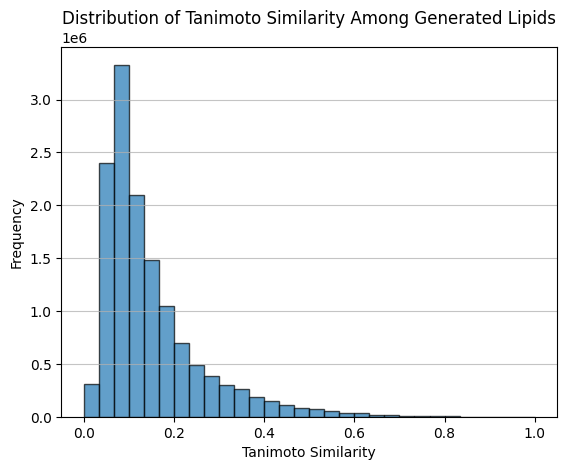

In [ ]:
generated_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/no_overlap.csv')
generated_lipids['Molecule'] = generated_lipids['canonical_smiles'].apply(Chem.MolFromSmiles)
generated_lipids['Fingerprint'] = generated_lipids['Molecule'].apply(lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048))
fingerprints = list(generated_lipids['Fingerprint'])
tanimoto_similarities = 1 - pdist(np.array(fingerprints), metric='jaccard')

plt.hist(tanimoto_similarities, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tanimoto Similarity Among Generated Lipids')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
average_tanimoto_similarity = tanimoto_similarities.mean()
print(f"Average Tanimoto Similarity: {average_tanimoto_similarity:.2f}")

Average Tanimoto Similarity: 0.15


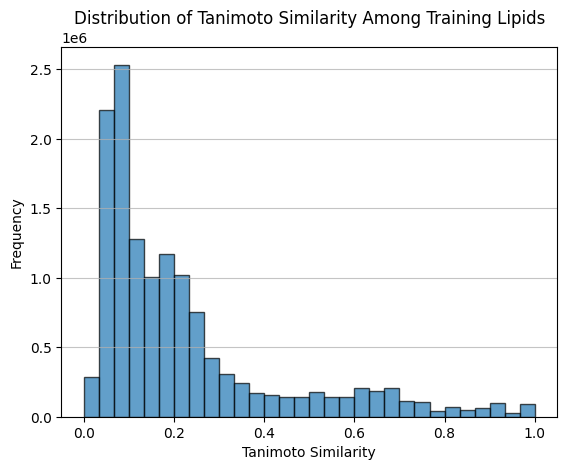

In [14]:
training_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps_clean.csv')
training_lipids['Molecule'] = training_lipids['smiles'].apply(Chem.MolFromSmiles)
training_lipids['Fingerprint'] = training_lipids['Molecule'].apply(lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048))
sample_training_lipids = training_lipids.sample(n=5213)
training_fingerprints = list(sample_training_lipids['Fingerprint'])
training_tanimoto_similarities = 1 - pdist(np.array(training_fingerprints), metric='jaccard')

plt.hist(training_tanimoto_similarities, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tanimoto Similarity Among Training Lipids')
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [15]:
average_training_tanimoto_similarity = training_tanimoto_similarities.mean()
print(f"Average Tanimoto Similarity: {average_training_tanimoto_similarity:.2f}")

Average Tanimoto Similarity: 0.22


As observed, the training dataset exhibits a greater degree of diversity compared to the generated lipids.

1. MW (Molecular Weight): Represents the molecular weight of the molecule. It's the sum of the atomic weights of all atoms in the molecule.

2. LogP: Represents the logarithm of the partition coefficient (P) between octanol and water. It's a measure of a molecule's lipophilicity, which can influence how a molecule is absorbed, distributed, metabolized, and excreted in living organisms. A higher LogP value typically indicates higher lipophilicity.

3. Rotatable (Number of Rotatable Bonds): Indicates the number of single bonds in a molecule that are not in a ring and have non-hydrogen atoms on both sides. This descriptor can give an idea of the molecule's flexibility. More rotatable bonds often mean that the molecule can adopt multiple conformations.

4. HBD (Number of Hydrogen Bond Donors): Represents the number of hydrogen atoms in the molecule that can form hydrogen bonds. These are typically hydrogen atoms attached to more electronegative atoms like nitrogen or oxygen.

5. HBA (Number of Hydrogen Bond Acceptors): Indicates the number of atoms in the molecule (typically oxygen, nitrogen, etc.) that can act as acceptors in hydrogen bonding. These atoms can form hydrogen bonds with hydrogen bond donors.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


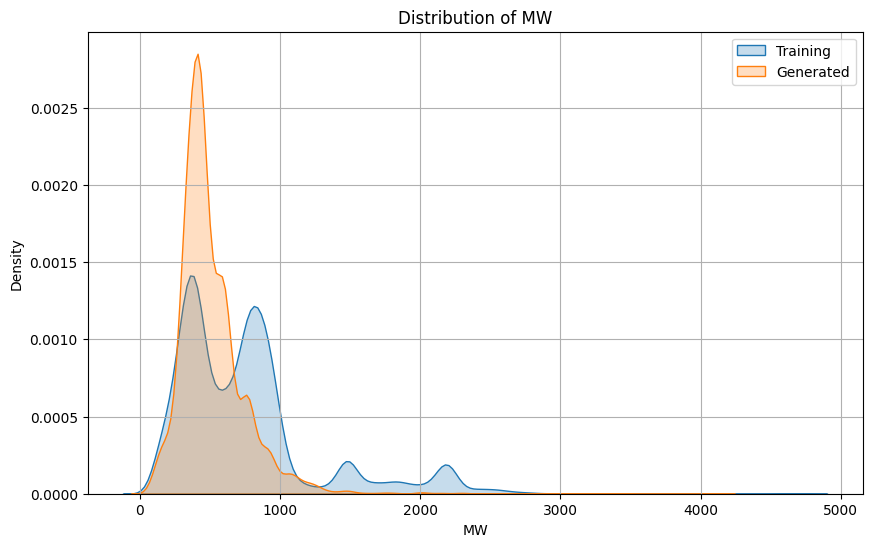

In [ ]:
!pip install rdkit

from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')

def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    rotatable = Descriptors.NumRotatableBonds(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)
    return pd.Series([mw, logp, rotatable, hbd, hba], index=['MW', 'LogP', 'Rotatable', 'HBD', 'HBA'])

# Example usage:
training_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps_clean.csv')
generated_lipids[['MW', 'LogP', 'Rotatable', 'HBD', 'HBA']] = generated_lipids['canonical_smiles'].apply(calculate_descriptors)
training_lipids[['MW', 'LogP', 'Rotatable', 'HBD', 'HBA']] = training_lipids['smiles'].apply(calculate_descriptors)


def plot_descriptor_distributions(train, gen, descriptor):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(train[descriptor], label='Training', fill=True)
    sns.kdeplot(gen[descriptor], label='Generated', fill=True)
    plt.title(f'Distribution of {descriptor}')
    plt.xlabel(descriptor)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_descriptor_distributions(training_lipids, generated_lipids, 'MW')


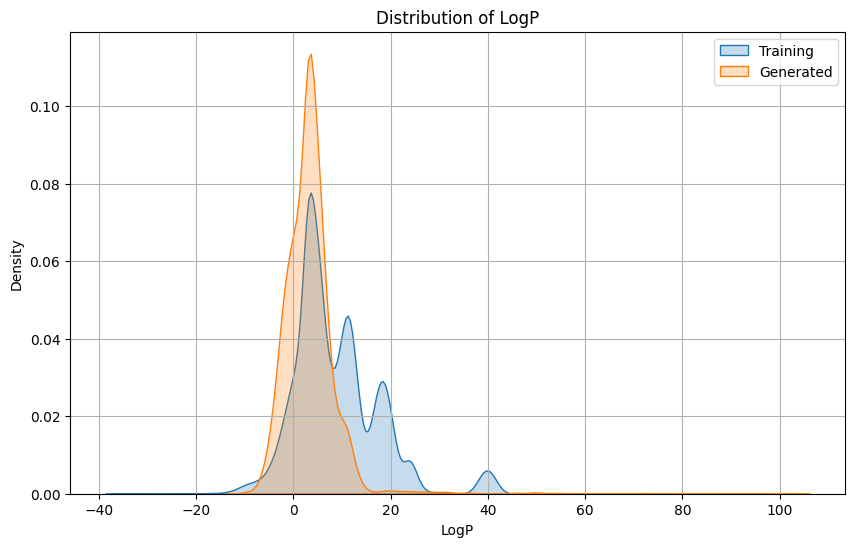

In [ ]:
plot_descriptor_distributions(training_lipids, generated_lipids, 'LogP')

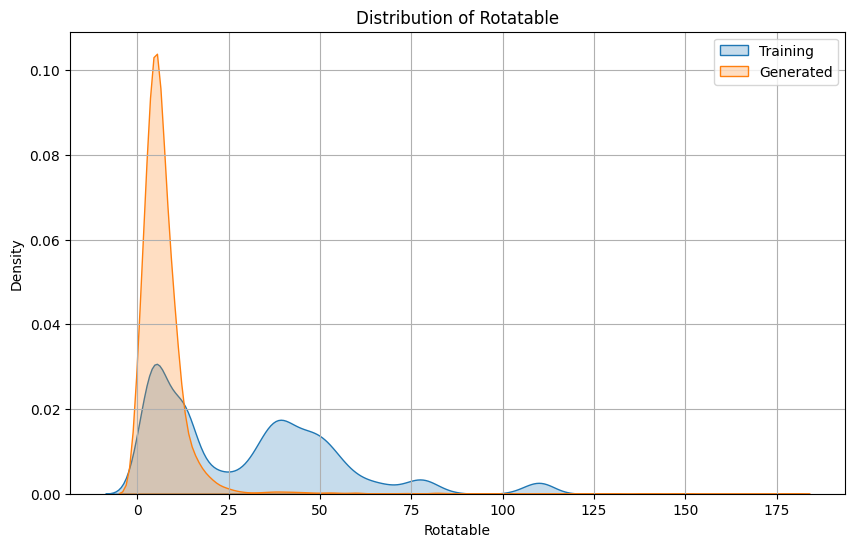

In [ ]:
plot_descriptor_distributions(training_lipids, generated_lipids, 'Rotatable')

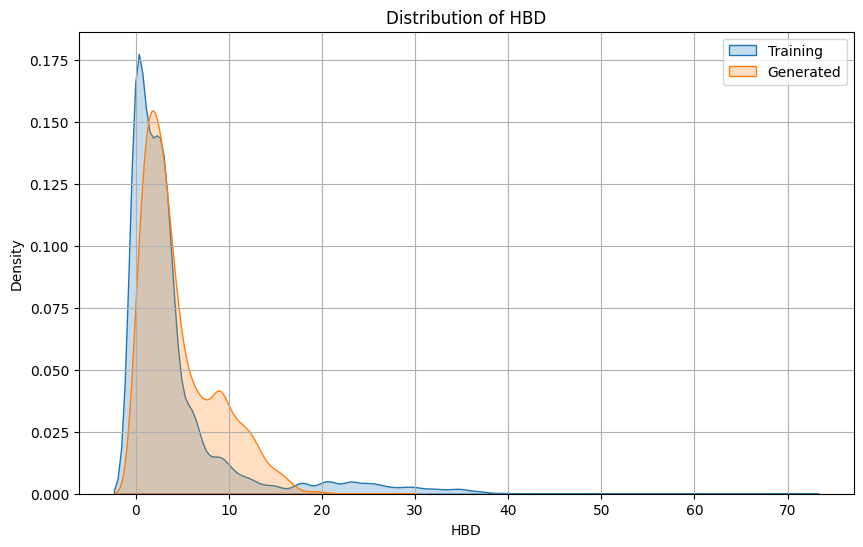

In [ ]:
plot_descriptor_distributions(training_lipids, generated_lipids, 'HBD')

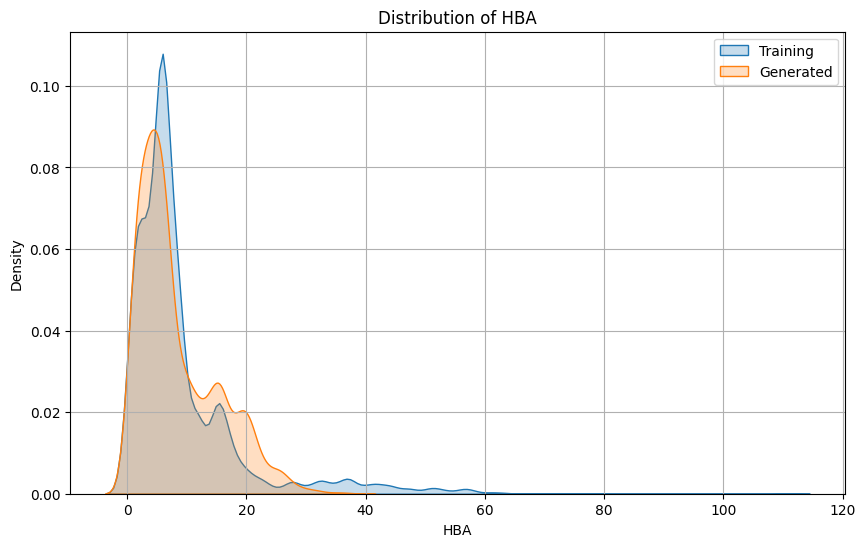

In [ ]:
plot_descriptor_distributions(training_lipids, generated_lipids, 'HBA')

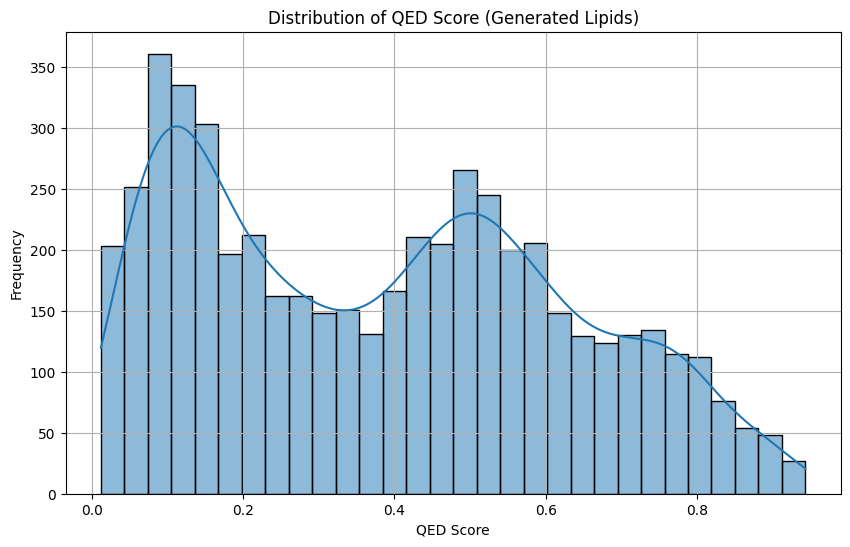

In [ ]:
from rdkit.Chem import QED

# Function to calculate QED
def calculate_qed(smiles):
    mol = Chem.MolFromSmiles(smiles)
    qed_score = QED.qed(mol)
    return qed_score

# Example usage:
generated_lipids['QED'] = generated_lipids['canonical_smiles'].apply(calculate_qed)

# Function to visualize QED distribution
def plot_qed_distribution(data, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, fill=True)
    plt.title(f'Distribution of QED Score ({title} Lipids)')
    plt.xlabel('QED Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage:
plot_qed_distribution(generated_lipids['QED'], 'Generated')

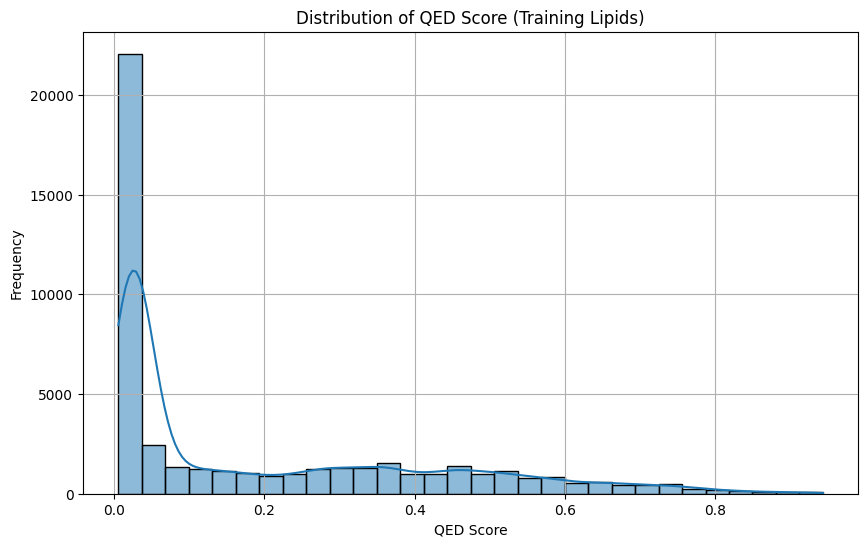

In [ ]:
training_lipids['QED'] = training_lipids['smiles'].apply(calculate_qed)
plot_qed_distribution(training_lipids['QED'], 'Training')

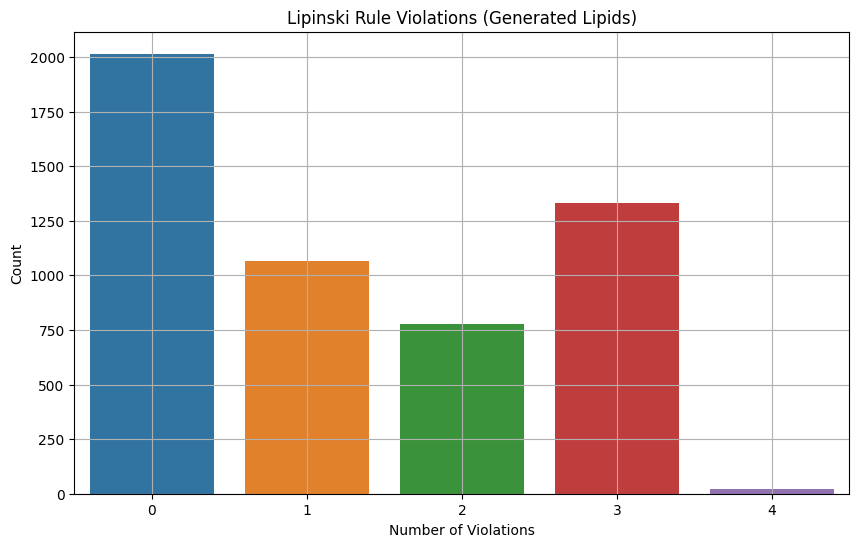

In [ ]:
# Function to check Lipinski's Rule of Five
def check_lipinski(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mw = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hbd = Descriptors.NumHDonors(mol)
    hba = Descriptors.NumHAcceptors(mol)

    # Checking Lipinski's rules
    lipinski_violations = sum([mw > 500, logp > 5, hbd > 5, hba > 10])
    return lipinski_violations

# Example usage:
generated_lipids['Lipinski Violations'] = generated_lipids['canonical_smiles'].apply(check_lipinski)

def plot_lipinski_violations(data, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data, order=sorted(data.unique()))
    plt.title(f'Lipinski Rule Violations ({title} Lipids)')
    plt.xlabel('Number of Violations')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

# Example usage with Pandas DataFrame:
plot_lipinski_violations(generated_lipids['Lipinski Violations'], 'Generated')

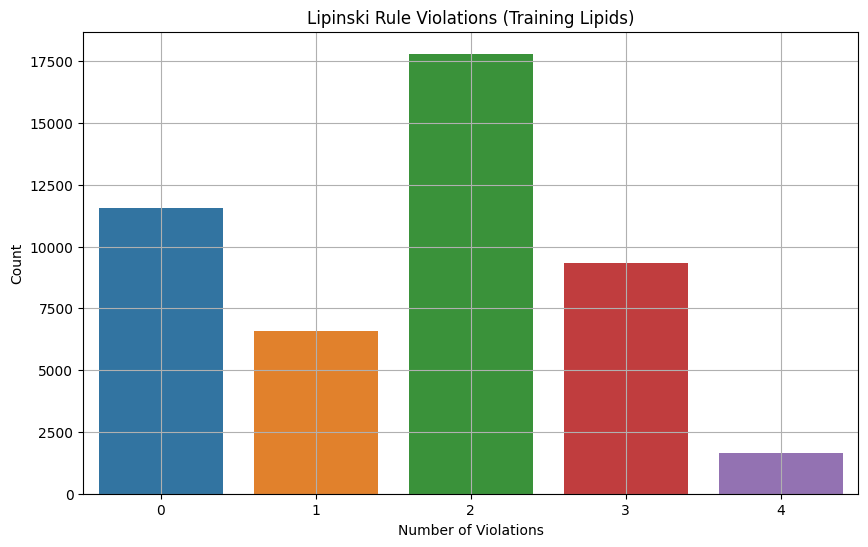

In [ ]:
training_lipids['Lipinski Violations'] = training_lipids['smiles'].apply(check_lipinski)
plot_lipinski_violations(training_lipids['Lipinski Violations'], 'Training')

A comparison is conducted between training and generated lipid SMILES, focusing on Molecular Weight (MW), LogP, rotatable bonds, Hydrogen Bond Donors (HBD), and Hydrogen Bond Acceptors (HBA). The generated lipids displayed a distinct, narrow distribution with lower mean values for MW, LogP, and rotatable bonds, while the training lipids exhibited a broader, multi-peak distribution. Conversely, HBD and HBA distributions were similar across both lipid sets. Notably, the generated lipids demonstrated superior drug-like properties as per the Quantitative Estimate of Drug-likeness (QED) score and Lipinski's rules.

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


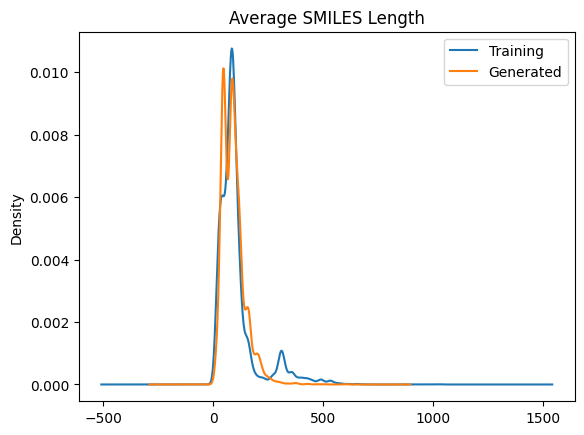

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive/')

generated_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/no_overlap.csv')
training_lipids = pd.read_csv('/content/drive/MyDrive/DATA 606/lipid_maps_clean.csv')
generated_lipids['length'] = generated_lipids['canonical_smiles'].str.len()
training_lipids['length'] = training_lipids['smiles'].str.len()

training_lipids['length'].plot(kind='kde', label='Training')
generated_lipids['length'].plot(kind='kde', label='Generated')
plt.title('Average SMILES Length')
plt.legend()
plt.show()

The distribution of the sizes between the generated SMILES and the training SMILES is notably similar.